#PROJECT(CASE STUDY) - Making a hybrid Deep Learning Model

# OBJECTIVE:- To create an advanced deep learning model that predicts the frauds in the credit card application dataset

#Part 1 - SOM

##Install MiniSom Package

In [1]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.9-cp37-none-any.whl size=8595 sha256=7e7c4a9a6161af96dfef3efc7f1f6f5c1cfe37d6073886e2645c0bca4ee04b43
  Stored in directory: /root/.cache/pip/wheels/de/a0/08/5234d6b02b29c561f62b6c985e2eb7d480fb0b92359a8c74e4
Successfully built MiniSom


## Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [5]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


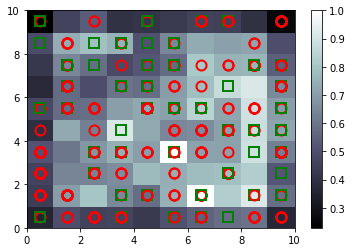

In [8]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()


#Red cicles coresspomds to customers didnt get approval and green square who got approval
#white are large mids so large outliers thus higher chance of fraud

## Finding the frauds


In [10]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(5,3)], mappings[(6,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [11]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15789611
15668679
15738487
15773421
15682686
15809837
15636521
15761554
15707602
15811690
15815095
15720725
15567834
15672912
15694677
15598614
15631267
15611189
15759387
15712483
15698522
15786237
15567839
15642336
15740487
15811742
15715907
15792107
15768342
15748532
15788634


#Part 2 - Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features

In [14]:
customers = dataset.iloc[:, 1:].values #Contains the info of all the customers in the bank and each line coresponds to one customer

## Create Dependent Variable

In [12]:
#Initial a vector of 0s and extract these customer ids and put it in vector of 0s. Then replace these 0s once for the index corresponidng to the customer ids.
is_fraud = np.zeros(len(dataset)) #Initial vector and is our dependable veariable. length dataset is the no. of observation in the dataset
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds: #extract the customer id of the customer which is in dataset.iloc[i,0],where i is line and 0 as the 1st coloumn of the datset contains the customer ids
    is_fraud[i] = 1 #to check if the customer id is in the list of frauds,if it does then we get 1 instead of a 0

#Part 3 - ANN

### Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

##Import Tensorflow

In [16]:
import tensorflow as tf
tf.__version__

'2.5.0'

## Initializing the ANN

In [20]:
ann = tf.keras.models.Sequential()

##Adding the input layer and the first hidden layer

In [21]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

## Adding the output layer

In [22]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

## Compiling the ANN

In [23]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training set

In [24]:
history = ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 2s 1ms/step - loss: 0.5358 - accuracy: 0.7768
Epoch 2/10
690/690 [==============================] - 1s 1ms/step - loss: 0.2887 - accuracy: 0.9449
Epoch 3/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1988 - accuracy: 0.9551
Epoch 4/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1557 - accuracy: 0.9551
Epoch 5/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1317 - accuracy: 0.9551
Epoch 6/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1178 - accuracy: 0.9551
Epoch 7/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1062 - accuracy: 0.9551
Epoch 8/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0986 - accuracy: 0.9551
Epoch 9/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0932 - accuracy: 0.9551
Epoch 10/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0876 - accuracy: 0.9551

In [25]:
ann.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (1, 2)                    32        
_________________________________________________________________
dense_1 (Dense)              (1, 1)                    3         
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [26]:
print(ann.get_weights())

[array([[ 0.79522043,  0.21041596],
       [ 0.00959884, -0.09546699],
       [ 0.04217461,  0.14656053],
       [ 0.12654082, -0.037585  ],
       [ 0.18887225, -0.12016811],
       [ 0.1388119 ,  0.29938462],
       [ 0.07171957,  0.08518098],
       [-0.22467083, -0.14590596],
       [-0.15571605, -0.12245204],
       [ 0.07532625,  0.21296637],
       [-0.60679364, -0.14613357],
       [-0.07285261,  0.23589404],
       [-0.15638448, -0.13483924],
       [ 0.07087696, -0.21039194],
       [-0.3013013 , -0.01175773]], dtype=float32), array([ 1.9001118 , -0.64971924], dtype=float32), array([[-2.8810215 ],
       [ 0.42102298]], dtype=float32), array([-1.1249348], dtype=float32)]


## Predicting test set results

In [31]:
y_pred = ann.predict(customers) #Gets the predicted probabilities
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [28]:
print(y_pred)

[[1.56366260e+07 1.82583460e-06]
 [1.57005490e+07 2.54826136e-06]
 [1.56547600e+07 3.03013780e-06]
 ...
 [1.56826860e+07 2.45097101e-01]
 [1.55723610e+07 2.45097101e-01]
 [1.56232100e+07 2.45097101e-01]]


ALL THE PROBABLITIES ARE SORTED FROM THE LOWEST ONE TO THE HIGHEST ONE AND THUS MAKING IT MUCH EASIER TO DETECT THE FRAUDS.

In [35]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


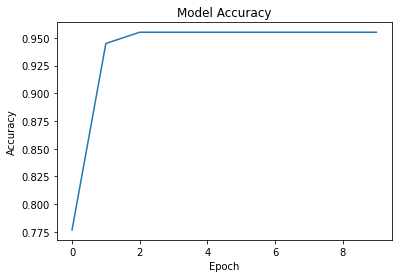

In [37]:
# Plot for Accuracy vs Epoch
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

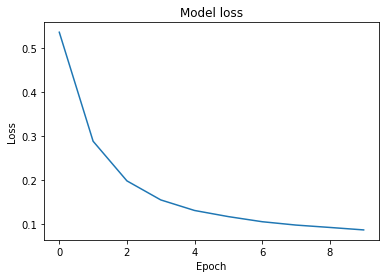

In [38]:
# Plot for Loss vs Epoch
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()